# Predicting Life Expectancy Using Machine Learning

The data-set aims to answer the following key questions:

1) Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

2) Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

3) How does Infant and Adult mortality rates affect life expectancy?

4) Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

5) What is the impact of schooling on the lifespan of humans?

6) Does Life Expectancy have positive or negative relationship with drinking alcohol?

7) Do densely populated countries tend to have lower life expectancy?

8) What is the impact of Immunization coverage on life Expectancy?


## Table of Contents

1. [Importing Libraries](#import_libraries)
2. [Importing Dataset](#import_data)
3. [Descriptive Analysis](#analysis)
4. [Exploratory Data Analysis](#eda)
5. [Data Preparation](#data_prepare)
6. [Building Linear Regression Model](#lr_model)
7. [Comparing Performance of Various Models](#models) 
8. [Comparing Performance of Various Models With Standard Scaler](#models_ss) 
9. [Comparing Performance of Various Models With MinMax Scaler](#models_ms)
10. [Finalizing The Model](#finalize)
11. [Saving The Model](#savem)
12. [Deploying The Model And Creating Scoring Endpoint URL](#deploy)

<a id="import_libraries"></a>
## Importing  Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.simplefilter("ignore")

<a id="import_data"></a>
## Importing Dataset

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0493a1cf48ad4f57ba0de471426b68ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*******************************',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0493a1cf48ad4f57ba0de471426b68ec.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-xad8rbrsp76tlp',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Thus, there are total 22 columns out of which 2 are of String type, 11 are of Decimal type and remaining of Integer type. 

<a id="analysis"></a>
## Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
df.dropna(subset=['Life expectancy '],inplace=True)
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<a id="eda"></a>
## Exploratory Data Analysis

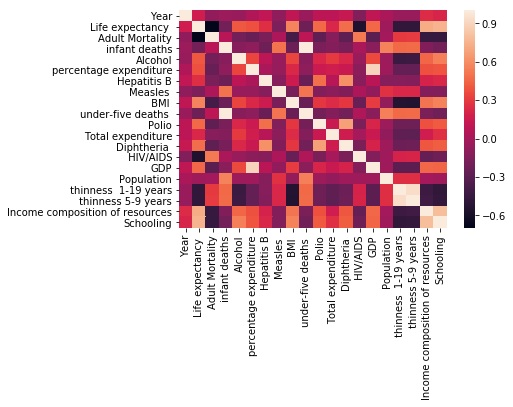

In [6]:
sns.heatmap(df.corr())

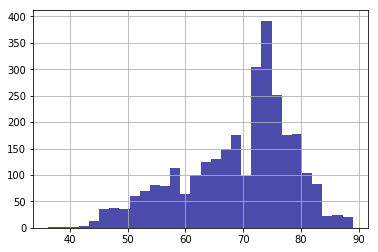

In [7]:
df['Life expectancy '].hist(bins=30,color='darkblue',alpha=0.7)

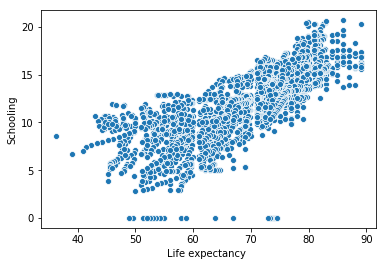

In [8]:
sns.scatterplot(df["Life expectancy "],df['Schooling'])

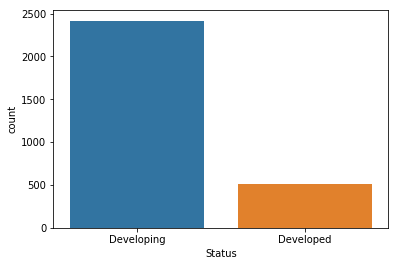

In [9]:
sns.countplot(df['Status'])

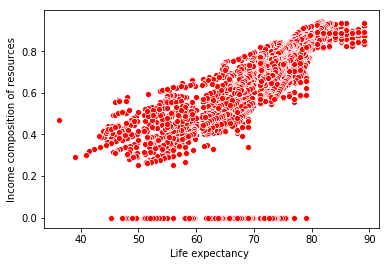

In [10]:
sns.scatterplot(df["Life expectancy "],df['Income composition of resources'],color="red")

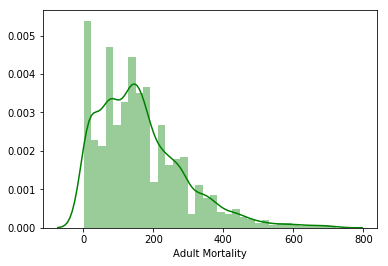

In [11]:
sns.distplot(df['Adult Mortality'],color="green")

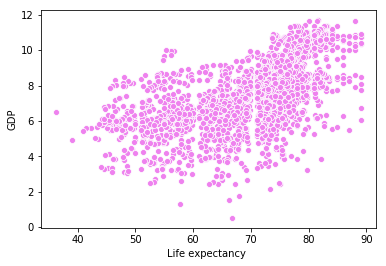

In [12]:
sns.scatterplot(df["Life expectancy "],np.log(df['GDP']),color="violet")

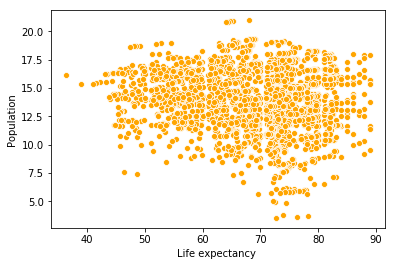

In [13]:
sns.scatterplot(df["Life expectancy "],np.log(df['Population']),color="orange")

<a id="data_prepare"></a>
## Data Preparation

In [14]:
df.drop('Population',axis=1,inplace=True)

In [15]:
for country in df['Country'].unique():
    df1=df[df['Country']==country]
    df1['Alcohol'].fillna(df1['Alcohol'].mean(),inplace=True)
    df1[' BMI '].fillna(df1[' BMI '].mean(),inplace=True)
    df1['Hepatitis B'].fillna(df1['Hepatitis B'].mean(),inplace=True)
    df1['Polio'].fillna(df1['Polio'].mean(),inplace=True)
    df1['Total expenditure'].fillna(df1['Total expenditure'].mean(),inplace=True)
    df1['Diphtheria '].fillna(df1['Diphtheria '].mean(),inplace=True)
    df1['GDP'].fillna(df1['GDP'].mean(),inplace=True)
    df1[' thinness  1-19 years'].fillna(df1[' thinness  1-19 years'].mean(),inplace=True)
    df1[' thinness 5-9 years'].fillna(df1[' thinness 5-9 years'].mean(),inplace=True)
    df1['Income composition of resources'].fillna(df1['Income composition of resources'].mean(),inplace=True)
    df1['Schooling'].fillna(df1['Schooling'].mean(),inplace=True)
    df[df['Country']==country]=df1
df['Alcohol'].fillna(df['Alcohol'].mean(),inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(),inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(),inplace=True)
df['Polio'].fillna(df['Polio'].mean(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(),inplace=True)
df['GDP'].fillna(df['GDP'].mean(),inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(),inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(),inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2928 non-null object
Year                               2928 non-null int64
Status                             2928 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2928 non-null int64
Alcohol                            2928 non-null float64
percentage expenditure             2928 non-null float64
Hepatitis B                        2928 non-null float64
Measles                            2928 non-null int64
 BMI                               2928 non-null float64
under-five deaths                  2928 non-null int64
Polio                              2928 non-null float64
Total expenditure                  2928 non-null float64
Diphtheria                         2928 non-null float64
 HIV/AIDS                          2928 non-null

In [17]:
LE=LabelEncoder()
df['Country']=LE.fit_transform(df['Country'])
df['Status']=LE.fit_transform(df['Status'])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


<a id="lr_model"></a>
## Building Linear Regression Model

In [18]:
X=df.drop(['Life expectancy '], axis=1)
Y= df['Life expectancy ']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [20]:
import math
mse=mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)
rmse

3.937144424236844

In [21]:
r2score=r2_score(y_test,y_pred)
r2score

0.8199296556801852

<a id="models"></a>
## Comparing Performance of Various Models

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [23]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('RF', RandomForestRegressor()))
results = []
names = []
n_splits = 5
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ET,0.962761,0.968413,0.964716,0.973062,0.964274,0.966645,0.004145
RF,0.958844,0.961010,0.952286,0.963370,0.951731,0.957448,0.005221
DT,0.897792,0.928721,0.918374,0.934443,0.926346,0.921135,0.014269
LR,0.822796,0.800277,0.805199,0.836936,0.808557,0.814753,0.014967
KNN,0.650397,0.683198,0.636245,0.683797,0.618229,0.654373,0.028929
SVM,-0.108036,-0.108556,-0.048667,-0.078244,-0.071606,-0.083022,0.025550


<a id="models_ss"></a>
## Comparing Performance of Various Models With Standard Scaler

In [24]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
results = []
names = []
n_splits = 5
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledET,0.966219,0.964049,0.963043,0.969680,0.962362,0.965071,0.002960
ScaledRF,0.953927,0.960721,0.950922,0.966373,0.952605,0.956909,0.006468
ScaledDT,0.925201,0.922845,0.915333,0.935054,0.933343,0.926355,0.008057
ScaledKNN,0.904147,0.915255,0.908440,0.915355,0.907184,0.910076,0.005022
ScaledSVM,0.852278,0.860618,0.839850,0.863042,0.850374,0.853233,0.009205
ScaledLR,0.822796,0.800277,0.805199,0.836936,0.808557,0.814753,0.014967


<a id="models_ms"></a>
## Comparing Performance of Various Models With MinMax Scaler

In [25]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVR())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', MinMaxScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestRegressor())])))
results = []
names = []
n_splits = 5
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledET,0.962518,0.963457,0.965481,0.970523,0.959456,0.964287,0.004107
ScaledRF,0.957440,0.959630,0.951307,0.965877,0.950566,0.956964,0.006319
ScaledDT,0.933254,0.930483,0.926048,0.934136,0.917346,0.928253,0.006863
ScaledKNN,0.888935,0.898090,0.894862,0.887275,0.896767,0.893186,0.004814
ScaledLR,0.822796,0.800277,0.805199,0.836936,0.808557,0.814753,0.014967
ScaledSVM,0.740906,0.743962,0.772040,0.751707,0.748081,0.751339,0.012273


<a id="finalize"></a>
## Finalizing The Model

In [26]:
etr=Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])
etr.fit(x_train,y_train)
y_pred=etr.predict(x_test)

In [27]:
import math
mse=mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)
rmse

1.7714090404600051

In [28]:
r2score=r2_score(y_test,y_pred)
r2score

0.9635483479199352

<a id="savem"></a>
## Saving The Model

In [29]:
val_credentials={
    "apikey": "*********************************",
  "iam_apikey_description": "Auto-generated for key 905255d4-a47b-47d8-bae9-b6fc3ca41ad7",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/50a600213e2b4bc198537f0a78beb930::serviceid:ServiceId-a3cc1823-b56c-4598-a8cd-b66ac75c22ca",
  "instance_id": "203008ea-906b-48ac-aaed-86b2ffe65461",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client=WatsonMachineLearningAPIClient(val_credentials)
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shalaka Thorat",  
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shalaka.thorat.432@gmail.com",
               client.repository.ModelMetaNames.NAME: "Python-Regression-Model"}

2020-06-12 11:33:36,944 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [31]:
model_artifact=client.repository.store_model(etr, meta_props=model_props)

In [32]:
guid=client.repository.get_model_uid(model_artifact)
guid

'2956d876-b766-4ce1-b0a9-e21a6413449e'

<a id="deploy"></a>
## Deploying The Model And Creating Scoring Endpoint URL

In [33]:
client=WatsonMachineLearningAPIClient(val_credentials)
deploy=client.deployments.create(guid,name="Life-Expectancy-Predictor")
deploy



#######################################################################################

Synchronous deployment creation for uid: '2956d876-b766-4ce1-b0a9-e21a6413449e' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='63601b6d-4864-459f-8d6e-beb8db75eda6'
------------------------------------------------------------------------------------------------




{'metadata': {'guid': '63601b6d-4864-459f-8d6e-beb8db75eda6',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/203008ea-906b-48ac-aaed-86b2ffe65461/deployments/63601b6d-4864-459f-8d6e-beb8db75eda6',
  'created_at': '2020-06-12T11:33:46.312Z',
  'modified_at': '2020-06-12T11:33:46.617Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Life-Expectancy-Predictor',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/203008ea-906b-48ac-aaed-86b2ffe65461/deployments/63601b6d-4864-459f-8d6e-beb8db75eda6/online',
  'deployable_asset': {'name': 'Python-Regression-Model',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/203008ea-906b-48ac-aaed-86b2ffe65461/published_models/2956d876-b766-4ce1-b0a9-e21a6413449e',
   'guid': '2956d876-b766-4ce1-b0a9-e21a6413449e',
   'created_at': '2020-06-12T11:33:46.287Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-

In [34]:
scoring_url=client.deployments.get_scoring_url(deploy)
client.deployments.list()

------------------------------------  -------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                       TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
63601b6d-4864-459f-8d6e-beb8db75eda6  Life-Expectancy-Predictor  online  DEPLOY_SUCCESS  2020-06-12T11:33:46.312Z  scikit-learn-0.20  model
------------------------------------  -------------------------  ------  --------------  ------------------------  -----------------  -------------
